In [33]:
import numpy as jnp
from matplotlib import pyplot as plt
import pickle
import numpy as np
import functools 

In [26]:
E_f = -28.569185442467138

In [4]:
## SR
err_sr = jnp.load("data/sr/rel_error_lr=0.009_diag=0.1.npy")

## momentum
err_momentum = jnp.load("data/momentum/rel_error_lr=0.009_beta=0.3_diag=0.1.npy")

index = jnp.arange(err_sr.shape[0])

Text(0.5, 1.0, 'lr = 0.09 diag = 0.1 beta = 0.3')

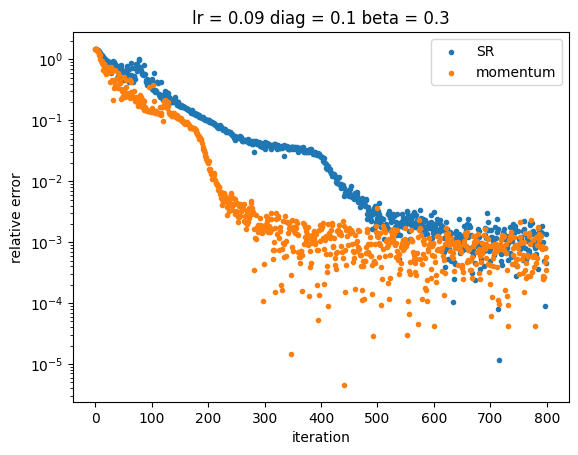

In [5]:
plt.scatter(index, err_sr, marker = ".", label = "SR")
plt.scatter(index, err_momentum, marker = ".", label = "momentum")

# plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("relative error")

plt.title("lr = 0.09 diag = 0.1 beta = 0.3")

## Hyperparameter-Search

In [16]:
files = [("data/momentum/hyper0/hyper220","hyperparameters_0.npy", 220),
        ("data/momentum/hyper1/hyper194","hyperparameters_1.npy", 194),
        ("data/momentum/hyper1/hyper454", "hyperparameters_1.npy", 454)]

In [17]:
data = []
for fname, hyper_path, index in files:
    with open(fname, 'rb') as f:
        res = pickle.load(f)

    hyper = jnp.load(hyper_path)[index]
    res["hyper"] = hyper
    data.append(res)

In [25]:
data[2]["hyper"]

array([0.00649939, 0.09907404, 0.5258399 ], dtype=float32)

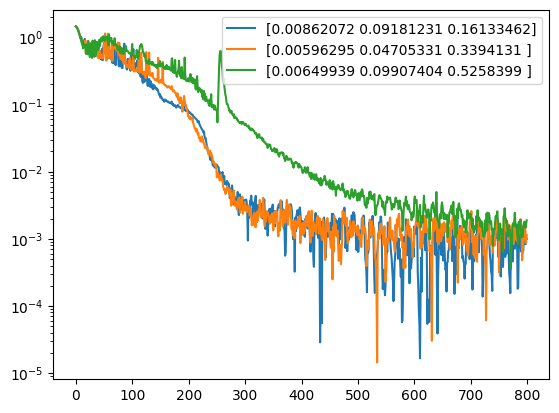

In [43]:
for dat in data:
    hyper_str = str(dat["hyper"])
    plt.plot(jnp.abs(dat["E"]-E_f)/-E_f, label = hyper_str)

plt.yscale("log")
plt.legend()